In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("train.csv")
print(data.info())
print("\n Embarked options: ", data["Embarked"].value_counts())

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None

 Embarked options:  S    644
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from sklearn.model_selection import train_test_split


# setting up new data types
dtypes_col       = data.columns
dtypes_type_old  = data.dtypes
dtypes_type      = ['int16', 'bool','category','object','category','float32','int8','int8','object','float32','object','category']
optimized_dtypes = dict(zip(dtypes_col, dtypes_type))

#read data once again with optimized columns
data_optimized = pd.read_csv("train.csv",dtype=optimized_dtypes)
test_optimized = pd.read_csv("test.csv",dtype=optimized_dtypes)

#splitting data to train and validation
train, valid = train_test_split(data_optimized, test_size=0.2)


combined = {"train":train,
            "valid":valid,
            "test":test_optimized}

print(data_optimized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int16
Survived       891 non-null bool
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float32
SibSp          891 non-null int8
Parch          891 non-null int8
Ticket         891 non-null object
Fare           891 non-null float32
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: bool(1), category(3), float32(2), int16(1), int8(2), object(3)
memory usage: 24.6+ KB
None


In [4]:
data_optimized.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
combined_cleaned = {}
for i,data in combined.items():
    combined_cleaned[i] = data.drop('Cabin', 1).copy()

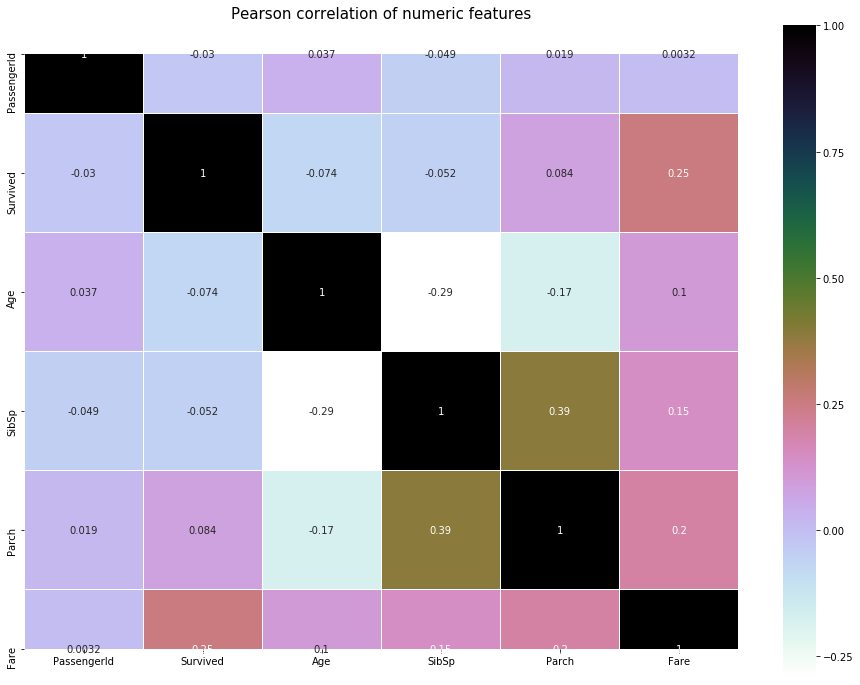

In [6]:
#numerical features

train_numeric = combined_cleaned["train"].select_dtypes(include=['float32','int16','int8','bool'])

colormap = plt.cm.cubehelix_r
plt.figure(figsize=(16,12))

plt.title('Pearson correlation of numeric features', y=1.05, size=15)
sns.heatmap(train_numeric.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

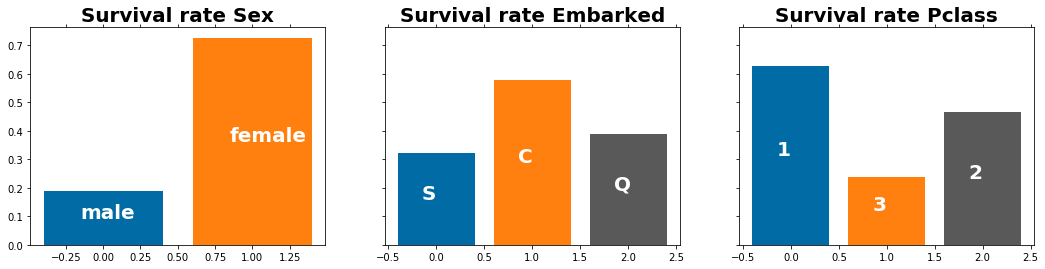

In [7]:
# category features# category features

#we do not count NaN categories
def survived_percent(categories,column):
    survived_list = []
    for c in categories.dropna():
        count = combined_cleaned["train"][combined_cleaned["train"][column] == c][column].count()
        survived = combined_cleaned["train"][combined_cleaned["train"][column] == c]["Survived"].sum()/count
        survived_list.append(survived)
    return survived_list    
   
category_features_list = ["Sex", "Embarked","Pclass"]
category_features = {}

for x in category_features_list:
    unique_values = combined_cleaned["train"][x].unique().dropna()
    survived = survived_percent(unique_values,x)
    category_features[x] = [unique_values, survived]


fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (89/255, 89/255, 89/255)
color=[cb_dark_blue,cb_orange,cb_grey]

font_dict = {'fontsize':20, 
             'fontweight':'bold',
             'color':"white"}

for i,cat in enumerate(category_features.keys()):
    number_categories = len(category_features[cat][0])
    axs[i].bar(range(number_categories), category_features[cat][1], color=color[:number_categories])
    axs[i].set_title("Survival rate " + cat ,fontsize=20, fontweight='bold' )
    for j,indx in enumerate(category_features[cat][1]):
        label_text = category_features[cat][0][j]
        x = j
        y = indx
        axs[i].annotate(label_text, xy = (x-0.15 ,y/2), **font_dict )

for i in range(3):
    axs[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    axs[i].patch.set_visible(False)

In [24]:
# filling NaN in "Embarked" and "Fare"

for i,data in combined_cleaned.items():
    data["Embarked"].fillna(value="S",inplace=True) # S is most popular value 
    mean_Fare = data["Fare"].mean()
    data["Fare"].fillna(value=mean_Fare,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


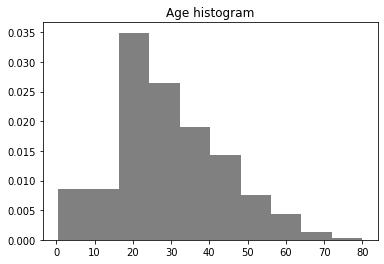

In [25]:
# filling NaN in "Age" 
fig, ax = plt.subplots( figsize=(6,4))
x = combined_cleaned["train"]["Age"].dropna()
hist, bins = np.histogram( x,bins=15)

#plot of histogram
ax.hist(x, normed=True, color='grey')
ax.set_title('Age histogram')
plt.show()

In [26]:
from random import choices

bin_centers = 0.5*(bins[:len(bins)-1]+bins[1:])
probabilities = hist/hist.sum()

#dictionary with random numbers from existing age distribution
for i,data in combined_cleaned.items():
    data["Age_rand"] = data["Age"].apply(lambda v: np.random.choice(bin_centers, p=probabilities))
    Age_null_list   = data[data["Age"].isnull()].index
    
    data.loc[Age_null_list,"Age"] = data.loc[Age_null_list,"Age_rand"]

In [27]:
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV

tree_data = {}
tree_data_category = {}

for i,data in combined_cleaned.items():
    tree_data[i] = data.select_dtypes(include=['float32','int16','int8']).copy()
    tree_data_category[i] = data.select_dtypes(include=['category'])

    #categorical variables handling
    for column in tree_data_category[i].columns:
        le = preprocessing.LabelEncoder()
        le.fit(data[column])
        tree_data[i][column+"_encoded"] = le.transform(data[column])

In [21]:
#finding best fit with gridsearch
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')

X =  tree_data["train"].drop("PassengerId",axis=1)
Y = combined_cleaned["train"]["Survived"]
tree_search.fit(X,Y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Tree best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 45, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Tree best score : 0.7893104423159901


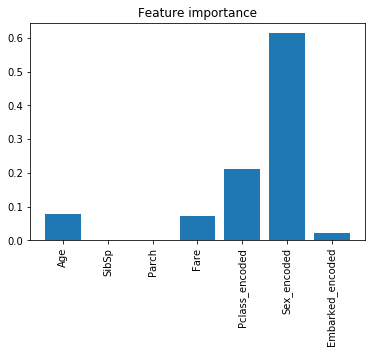

In [28]:
tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,Y)

train_columns = list(tree_data["train"].columns)
train_columns.remove("PassengerId")
fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()

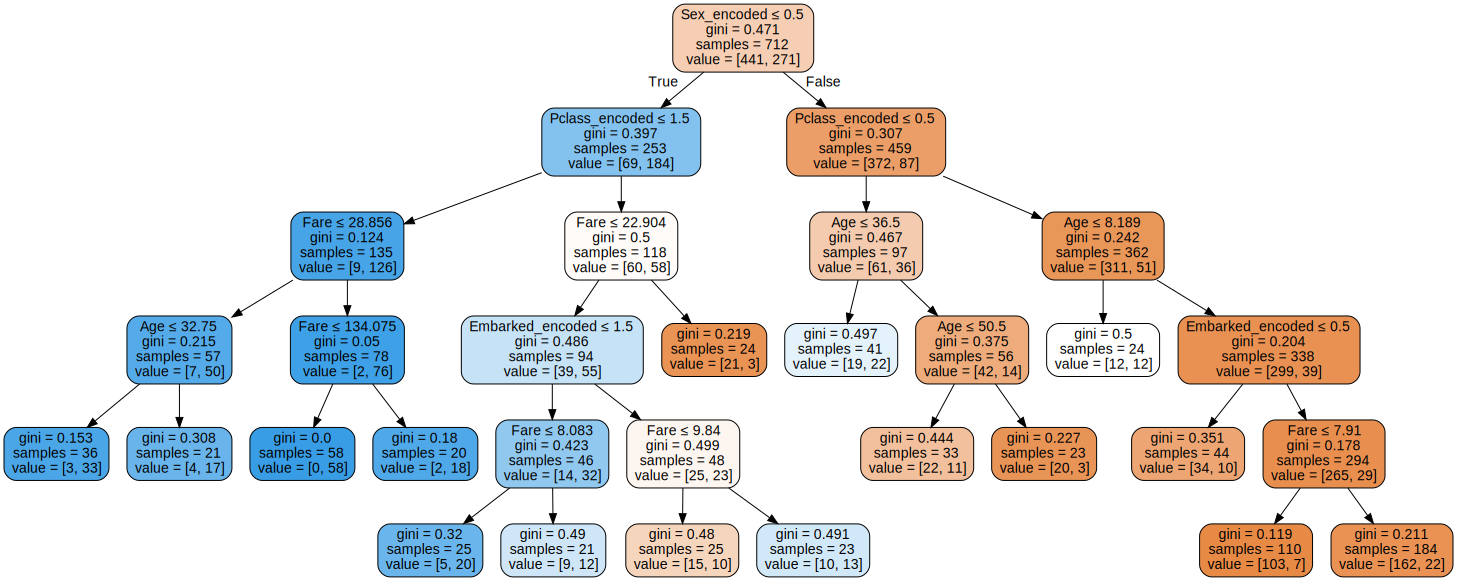

In [23]:
import graphviz 

dot_data = tree.export_graphviz(tree_optimized, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph